In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [ ]:
df = pd.read_csv('life_expectancy.csv')
df

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,HepB,measles,...,Polio,total_expenditure,DPT,HIV_AIDS,GDP,population,thinness_10_19,thinness_5_9,HDI,school_year
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
 import missingno as msno

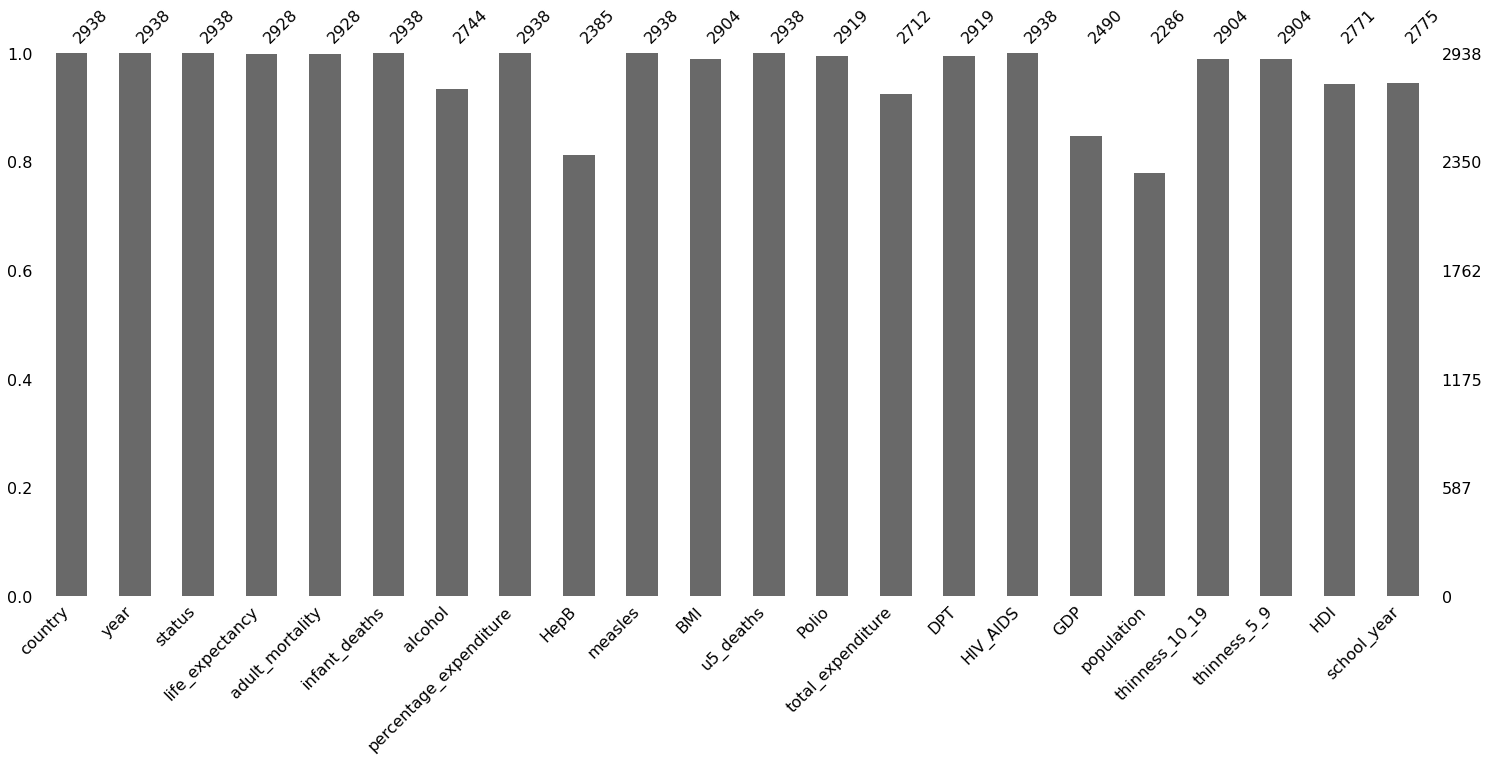

In [ ]:
msno.bar(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 2938 non-null   object 
 1   year                    2938 non-null   int64  
 2   status                  2938 non-null   object 
 3   life_expectancy         2928 non-null   float64
 4   adult_mortality         2928 non-null   float64
 5   infant_deaths           2938 non-null   int64  
 6   alcohol                 2744 non-null   float64
 7   percentage_expenditure  2938 non-null   float64
 8   HepB                    2385 non-null   float64
 9   measles                 2938 non-null   int64  
 10  BMI                     2904 non-null   float64
 11  u5_deaths               2938 non-null   int64  
 12  Polio                   2919 non-null   float64
 13  total_expenditure       2712 non-null   float64
 14  DPT                     2919 non-null   

In [ ]:
df = df[~df.life_expectancy.isna()]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns='life_expectancy')
y = df.life_expectancy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
numerical_pipeline = Pipeline([
                               ('imputer', SimpleImputer(strategy='mean')),
                               ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline([
                                 ('imputer', SimpleImputer(strategy='most_frequent')),
                                 ('scaler', OneHotEncoder())
])

In [ ]:
X_train.head()

,country,year,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,HepB,measles,BMI,...,Polio,total_expenditure,DPT,HIV_AIDS,GDP,population,thinness_10_19,thinness_5_9,HDI,school_year
456,Cabo Verde,2007,Developing,126.0,0,5.28,345.463714,96.0,0,25.5,...,98.0,4.30,98.0,0.6,3112.285712,486438.0,8.1,8.0,0.602,11.9
462,Cabo Verde,2001,Developing,152.0,0,3.81,150.743486,NaN,0,22.1,...,91.0,5.19,9.0,0.8,1268.884564,443716.0,9.4,9.3,0.562,11.0
2172,Saint Lucia,2011,Developing,143.0,0,10.43,0.000000,99.0,0,44.5,...,99.0,7.58,99.0,0.1,NaN,NaN,4.3,4.3,0.733,12.9
2667,Tunisia,2013,Developing,13.0,3,1.29,594.645310,98.0,16,59.3,...,98.0,7.26,98.0,0.1,4199.472530,1114558.0,6.4,6.3,0.720,14.7
381,Brunei Darussalam,2002,Developing,95.0,0,0.13,941.703687,99.0,0,28.0,...,99.0,3.40,94.0,0.1,16846.219800,NaN,6.7,6.1,0.820,13.3


In [ ]:
list(X_train)

['country',
 'year',
 'status',
 'adult_mortality',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'HepB',
 'measles',
 'BMI',
 'u5_deaths',
 'Polio',
 'total_expenditure',
 'DPT',
 'HIV_AIDS',
 'GDP',
 'population',
 'thinness_10_19',
 'thinness_5_9',
 'HDI',
 'school_year']

In [ ]:
preprocessor = ColumnTransformer([
                                  ('numeric', numerical_pipeline, ['adult_mortality','infant_deaths','alcohol','percentage_expenditure','HepB','measles','BMI','u5_deaths','Polio','total_expenditure','DPT',
                                                                   'HIV_AIDS','GDP','population','thinness_10_19','thinness_5_9','HDI','school_year']),
                                 
                                  ('categoric', categorical_pipeline, ['country', 'year', 'status',])
])

In [ ]:
!pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 5.6 MB/s 
  Created wheel for jcopml: filename=jcopml-1.1.15-py2.py3-none-any.whl size=32026 sha256=9e44b17f607ca309797edcabc0c86b21cf65f9ccf0974dcb0faea7422fa75cc7
  Stored in directory: /root/.cache/pip/wheels/43/7a/bb/396851d7ac5c4c9342ec8657593da1eee1bad1854e54d51d81
Successfully built jcopml


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [ ]:
from pandas.core.common import random_state
pipeline = Pipeline([
                     ('prep', preprocessor),
                     ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state = 42)
model.fit(X_train, y_train)
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[04:25:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'algo__colsample_bytree': 0.42066805426927745, 'algo__gamma': 1, 'algo__learning_rate': 0.035015835937029005, 'algo__max_depth': 9, 'algo__n_estimators': 176, 'algo__reg_alpha': 2.772824182801065, 'algo__reg_lambda': 0.0010661259689433889, 'algo__subsample': 0.5553736512887829}
0.9857970848175069 0.9570179780723014 0.964581472309684


In [ ]:
from jcopml.feature_importance import mean_score_decrease

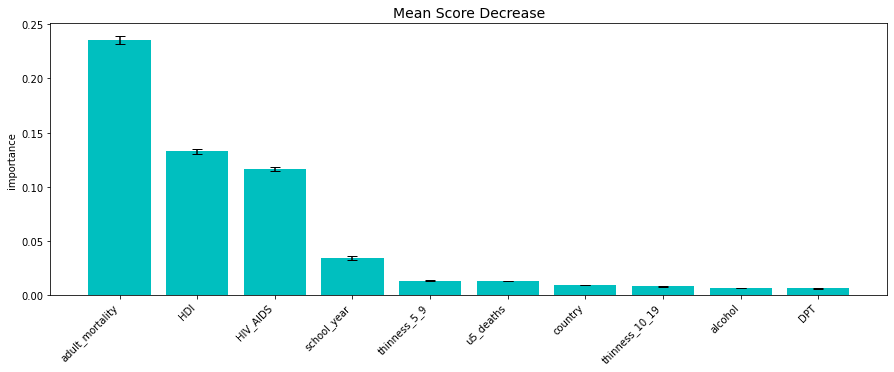

In [ ]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=10)